In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

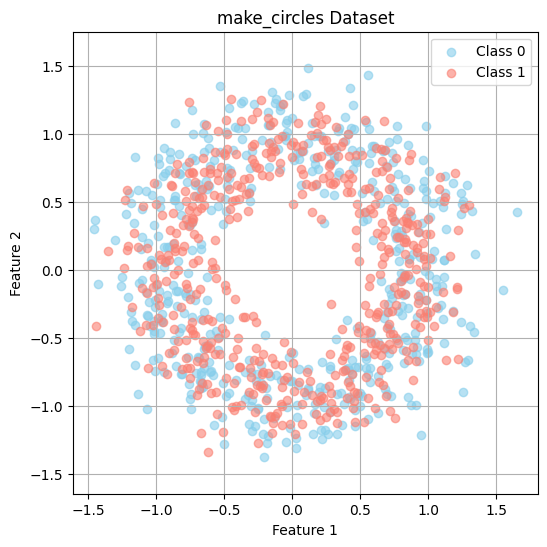

In [ ]:
# Enter your solution here

import matplotlib.pyplot as plt
# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='skyblue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='salmon', label='Class 1', alpha=0.6)
plt.title('make_circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Keep aspect ratio equal for circular shape
plt.show()

## Problem 2
How many samples are there in the dataset?


In [ ]:
# Enter your solution here

num_samples, num_features = X.shape

print(f"Number of samples: {num_samples}")

Number of samples: 1000


## Problem 3
How many features are there in the dataset?

In [ ]:
# Enter your solution here

print(f"Number of features: {num_features}")

Number of features: 2


## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# Enter your solution here

import numpy as np

# Compute the dot product matrix
dot_product = np.dot(X, X.T)

# Apply polynomial kernel of degree 2
K = (dot_product + 1) ** 2

# Compute the Frobenius norm
fro_norm = np.linalg.norm(K, 'fro')

# Final quantity
n = X.shape[0]
result = (1 / n) * fro_norm

# Round to two decimal places
print(f"{result:.2f}")

2.10


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# Enter your solution here

# Gaussian kernel parameter
sigma = 2.0
gamma = 1 / (2 * sigma ** 2)

# Compute squared Euclidean distances
sq_norms = np.sum(X**2, axis=1)
dists_squared = sq_norms[:, None] + sq_norms[None, :] - 2 * np.dot(X, X.T)

# Compute the RBF kernel
K = np.exp(-gamma * dists_squared)

# Frobenius norm and final value
fro_norm = np.linalg.norm(K, 'fro')
n = X.shape[0]
result = fro_norm / n

# Round to two decimal places
print(f"{result:.2f}")

0.81


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [ ]:
# Enter your solution here

# Compute linear kernel
K = np.dot(X, X.T)

# Center the kernel matrix
n = K.shape[0]
one_n = np.ones((n, n)) / n
K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

# Compute Frobenius norm and final value
fro_norm = np.linalg.norm(K_centered, 'fro')
result = fro_norm / n

# Print result rounded to two decimal places
print(f"{result:.2f}")

0.70


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [ ]:
# Enter your solution here

# Polynomial kernel (degree 2)
K = (X @ X.T + 1) ** 2

# Center the kernel matrix
n = K.shape[0]
one_n = np.ones((n, n)) / n
K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

# Eigen decomposition
eigvals, eigvecs = np.linalg.eigh(K_centered)

# Select top 2 eigenvalues/eigenvectors (sorted in descending order)
top_indices = np.argsort(eigvals)[::-1][:2]
top_eigvals = eigvals[top_indices]
top_eigvecs = eigvecs[:, top_indices]

# Compute projections
projections = top_eigvecs * np.sqrt(top_eigvals)

# Compute final quantity
total_sum = np.sum(projections)

# Round to two decimal places
print(f"{total_sum:.2f}")

-0.00
